<a href="https://colab.research.google.com/github/whgustj00/AI_study/blob/main/05_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%BC_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%ED%95%99%EC%83%9D%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 텐서플로 버전과 동작 확인

import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.14.0
tf.Tensor(
[[0.63551533 0.9044515  0.19454718]
 [0.34390104 0.9509957  0.49801016]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# 텐서플로와 넘파이의 호환

import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.56986105 0.4072777  0.17495584]
 [0.05590653 0.5494441  0.7715447 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.34129544 0.71874586 0.94141892]
 [0.75008045 0.93979445 0.31525859]] 

덧셈 결과:
 tf.Tensor(
[[0.91115654 1.1260235  1.1163747 ]
 [0.805987   1.4892385  1.0868033 ]], shape=(2, 3), dtype=float32)


In [ ]:
# 텐서플로가 제공하는 데이터셋의 텐서 구조 확인하기

import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) # 원핫 코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
MNIST:  (60000, 28, 28) (60000,) (60000, 10)
170498071/170498071 [==============================] - 3s 0us/step
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 [==============================] - 0s 0us/step
Boston Housing:  (404, 13) (404,)
2110848/2110848 [==============================] - 0s 0us/step
Reuters:  (8982,) (8982,)


In [ ]:
# 텐서플로 프로그래밍: 사이킷런의 퍼셉트론 동작

import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
# 텐서플로 프로그래밍: 퍼셉트론 학습

import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b])
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.7689822
loss at epoch 100 = 0.090848535
loss at epoch 200 = 0.042094797
loss at epoch 300 = 0.026505323
loss at epoch 400 = 0.01910477
tf.Tensor(
[[-0.8163999 ]
 [ 0.88647133]
 [ 0.88635904]
 [ 0.99926734]], shape=(4, 1), dtype=float32)


In [ ]:
# 케라스 프로그래밍: 퍼셉트론 학습

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_iv=2
n_dv=1

perceptron=Sequential()
perceptron.add(Dense(units=n_dv   ,activation='tanh',
                     input_shape=(n_iv,   ),
                     kernel_initializer='random_uniform',
                     bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),
                   metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 2s - loss: 1.0134 - mse: 1.0134 - 2s/epoch - 2s/step
Epoch 2/500
1/1 - 0s - loss: 0.7577 - mse: 0.7577 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6451 - mse: 0.6451 - 7ms/epoch - 7ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5902 - mse: 0.5902 - 7ms/epoch - 7ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5573 - mse: 0.5573 - 7ms/epoch - 7ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5337 - mse: 0.5337 - 8ms/epoch - 8ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5148 - mse: 0.5148 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4984 - mse: 0.4984 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4836 - mse: 0.4836 - 7ms/epoch - 7ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4697 - mse: 0.4697 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4566 - mse: 0.4566 - 10ms/epoch - 10ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4440 - mse: 0.4440 - 6ms/epoch - 6ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4320 - mse: 0.4320 - 7ms/epoch - 7ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4203 - mse: 0.4

## 실습 1 iris 데이터셋으로 구현 (발표 +5점)

In [ ]:
# 케라스 프로그래밍: 퍼셉트론 학습
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot 인코더 사용
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

n_iv = 4  # 입력 변수 개수 (iris 데이터셋은 4개의 특징을 가지고 있음)
n_dv = 3  # 클래스 개수 (iris 데이터셋은 3개의 클래스를 가지고 있음)

# 모델 생성
perceptron = Sequential()
perceptron.add(Dense(units=8, activation='relu', input_shape=(n_iv,)))
perceptron.add(Dense(units=n_dv, activation='softmax'))

perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# 모델 훈련
perceptron.fit(X_train, y_train, epochs=500, verbose=2)

# 모델 평가 및 정확도 출력
accuracy = perceptron.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy[1]}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/500
4/4 - 1s - loss: 0.3494 - accuracy: 0.3524 - 664ms/epoch - 166ms/step
Epoch 2/500
4/4 - 0s - loss: 0.3261 - accuracy: 0.3524 - 20ms/epoch - 5ms/step
Epoch 3/500
4/4 - 0s - loss: 0.3012 - accuracy: 0.3524 - 19ms/epoch - 5ms/step
Epoch 4/500
4/4 - 0s - loss: 0.2886 - accuracy: 0.3238 - 20ms/epoch - 5ms/step
Epoch 5/500
4/4 - 0s - loss: 0.2829 - accuracy: 0.2952 - 23ms/epoch - 6ms/step
Epoch 6/500
4/4 - 0s - loss: 0.2808 - accuracy: 0.2762 - 18ms/epoch - 4ms/step
Epoch 7/500
4/4 - 0s - loss: 0.2798 - accuracy: 0.3048 - 18ms/epoch - 5ms/step
Epoch 8/500
4/4 - 0s - loss: 0.2796 - accuracy: 0.2762 - 20ms/epoch - 5ms/step
Epoch 9/500
4/4 - 0s - loss: 0.2796 - accuracy: 0.2857 - 18ms/epoch - 5ms/step
Epoch 10/500
4/4 - 0s - loss: 0.2785 - accuracy: 0.2952 - 26ms/epoch - 7ms/step
Epoch 11/500
4/4 - 0s - loss: 0.2783 - accuracy: 0.3048 - 24ms/epoch - 6ms/step
Epoch 12/500
4/4 - 0s - loss: 0.2775 - accuracy: 0.2952 - 21ms/epoch - 5ms/step
Epoch 13/500
4/4 - 0s - loss: 0.2775 - accurac

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
# 5-7(a) 텐서플로 프로그래밍: 다층 퍼셉트론으로 MNIST 인식1

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 10s - loss: 0.0434 - accuracy: 0.8411 - val_loss: 0.0287 - val_accuracy: 0.9112 - 10s/epoch - 21ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0224 - accuracy: 0.9289 - val_loss: 0.0188 - val_accuracy: 0.9412 - 8s/epoch - 18ms/step
Epoch 3/30
469/469 - 9s - loss: 0.0166 - accuracy: 0.9483 - val_loss: 0.0153 - val_accuracy: 0.9532 - 9s/epoch - 20ms/step
Epoch 4/30
469/469 - 9s - loss: 0.0138 - accuracy: 0.9573 - val_loss: 0.0126 - val_accuracy: 0.9605 - 9s/epoch - 19ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0121 - accuracy: 0.9631 - val_loss: 0.0123 - val_accuracy: 0.9628 - 8s/epoch - 17ms/step
Epoch 6/30
469/469 - 9s - loss: 0.0110 - accuracy: 0.9672 - val_loss: 0.0108 - val_accuracy: 0.9653 - 9s/epoch - 20ms/step
Epoch 7/30
469/469 - 9s - loss: 0.0102 - accuracy: 0.9714 - val_loss: 0.0106 - val_accuracy: 0.9674 - 9s/epoch - 20ms/step
Epoch 8/30
469/469 - 9s - loss: 0.0095 - accuracy: 0.9737 - val_loss: 0.0101 - val_accuracy: 0.9672 - 9s/epoch - 18ms/step
Epoch 9/30
469

# 실습2: 텐서플로 프로그래밍: 다층 퍼셉트론으로 digits 적용

In [ ]:
# 실습2: 텐서플로 프로그래밍: 다층 퍼셉트론으로 digits 적용

from sklearn import datasets
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# digit 읽어 와서 신경망에 입력할 형태로 변환
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)
# x_train = x_train.reshape(60000,784) # 텐서 모양 변환
# x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/16.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/16.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=64
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
9/9 - 1s - loss: 0.0737 - accuracy: 0.5974 - val_loss: 0.0523 - val_accuracy: 0.8734 - 768ms/epoch - 85ms/step
Epoch 2/30
9/9 - 0s - loss: 0.0485 - accuracy: 0.8831 - val_loss: 0.0453 - val_accuracy: 0.9082 - 89ms/epoch - 10ms/step
Epoch 3/30
9/9 - 0s - loss: 0.0423 - accuracy: 0.9258 - val_loss: 0.0427 - val_accuracy: 0.8971 - 85ms/epoch - 9ms/step
Epoch 4/30
9/9 - 0s - loss: 0.0400 - accuracy: 0.9295 - val_loss: 0.0404 - val_accuracy: 0.9096 - 85ms/epoch - 9ms/step
Epoch 5/30
9/9 - 0s - loss: 0.0385 - accuracy: 0.9332 - val_loss: 0.0401 - val_accuracy: 0.9152 - 85ms/epoch - 9ms/step
Epoch 6/30
9/9 - 0s - loss: 0.0380 - accuracy: 0.9471 - val_loss: 0.0394 - val_accuracy: 0.9235 - 86ms/epoch - 10ms/step
Epoch 7/30
9/9 - 0s - loss: 0.0377 - accuracy: 0.9360 - val_loss: 0.0390 - val_accuracy: 0.9207 - 83ms/epoch - 9ms/step
Epoch 8/30
9/9 - 0s - loss: 0.0374 - accuracy: 0.9351 - val_loss: 0.0390 - val_accuracy: 0.9263 - 88ms/epoch - 10ms/step
Epoch 9/30
9/9 - 0s - loss: 0.0369 

KeyboardInterrupt: ignored

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 10s - loss: 0.0722 - accuracy: 0.6798 - val_loss: 0.0335 - val_accuracy: 0.8181 - 10s/epoch - 21ms/step
Epoch 2/30
469/469 - 9s - loss: 0.0304 - accuracy: 0.8432 - val_loss: 0.0295 - val_accuracy: 0.8405 - 9s/epoch - 19ms/step
Epoch 3/30
469/469 - 9s - loss: 0.0270 - accuracy: 0.8585 - val_loss: 0.0264 - val_accuracy: 0.8529 - 9s/epoch - 18ms/step
Epoch 4/30
469/469 - 9s - loss: 0.0250 - accuracy: 0.8687 - val_loss: 0.0258 - val_accuracy: 0.8603 - 9s/epoch - 19ms/step
Epoch 5/30
469/469 - 10s - loss: 0.0238 - accuracy: 0.8743 - val_loss: 0.0241 - val_accuracy: 0.8615 - 10s/epoch - 20ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0224 - accuracy: 0.8806 - val_loss: 0.0232 - val_accuracy: 0.8664 - 8s/epoch - 17ms/step
Epoch 7/30
469/469 - 9s - loss: 0.0216 - accuracy: 0.8857 - val_loss: 0.0222 - val_accuracy: 0.8708 - 9s/epoch - 20ms/step
Epoch 8/30
469/469 - 9s - loss: 0.0208 - accuracy: 0.8885 - val_loss: 0.

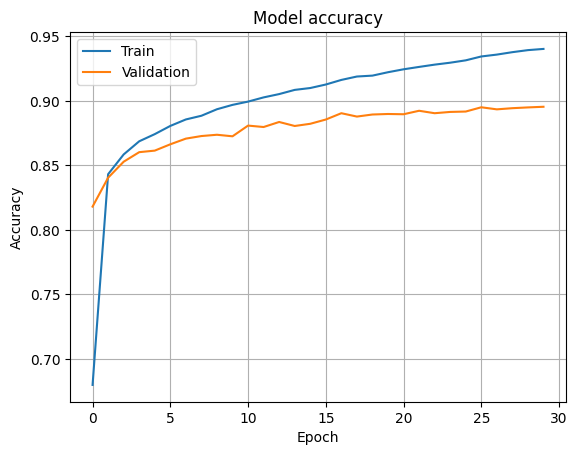

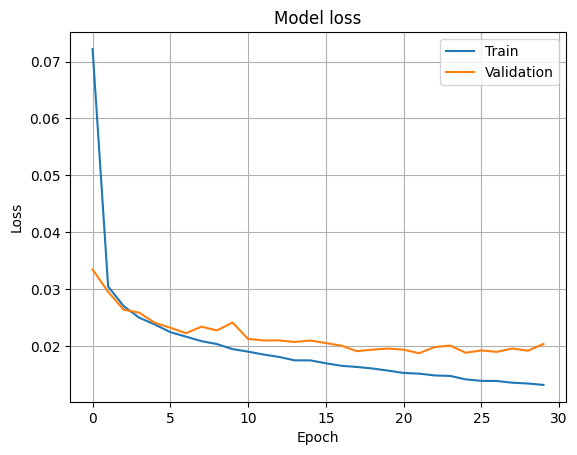

In [ ]:
# 5-8 텐서플로 프로그래밍: 다층 퍼셉트론으로 fashion MNIST 인식

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

# 실습3 깊이를 5층 이상으로 늘리고 세부 옵션 변경하여 정확도 향상

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 33s - loss: 0.0261 - accuracy: 0.8963 - val_loss: 0.0131 - val_accuracy: 0.9425 - 33s/epoch - 70ms/step
Epoch 2/30
469/469 - 18s - loss: 0.0105 - accuracy: 0.9522 - val_loss: 0.0085 - val_accuracy: 0.9595 - 18s/epoch - 38ms/step
Epoch 3/30
469/469 - 18s - loss: 0.0070 - accuracy: 0.9669 - val_loss: 0.0068 - val_accuracy: 0.9675 - 18s/epoch - 38ms/step
Epoch 4/30
469/469 - 18s - loss: 0.0055 - accuracy: 0.9744 - val_loss: 0.0057 - val_accuracy: 0.9704 - 18s/epoch - 39ms/step
Epoch 5/30
469/469 - 18s - loss: 0.0045 - accuracy: 0.9792 - val_loss: 0.0054 - val_accuracy: 0.9707 - 18s/epoch - 39ms/step
Epoch 6/30
469/469 - 18s - loss: 0.0038 - accuracy: 0.9825 - val_loss: 0.0050 - val_accuracy: 0.9745 - 18s/epoch - 39ms/step
Epoch 7/30
469/469 - 20s - loss: 0.0033 - accuracy: 0.9847 - val_loss: 0.0050 - val_accuracy: 0.9730 - 20s/epoch - 43ms/step
Epoch 8/30
469/469 - 19s - loss: 0.0030 - accuracy: 0.9869 -

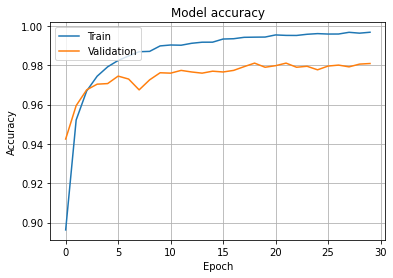

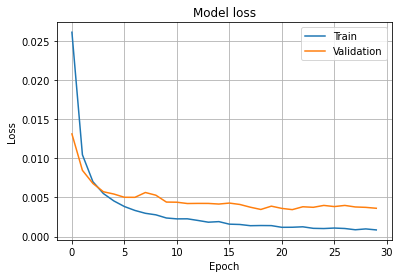

In [ ]:
# 5-9 깊은 다층 퍼셉트론으로 fashion MNIST 인식

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()